In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

from scipy.stats import chisquare

In [2]:
listings_df = pd.read_csv('./cleaned_datasets/listings_cleaned.csv')
listings_df.dtypes

Unnamed: 0                                     int64
accommodates                                 float64
availability_30                                int64
bathrooms                                    float64
bed_type                                      object
                                              ...   
ev_charger                                     int64
tub_with_shower_bench                          int64
roll-in_shower_with_shower_bench_or_chair      int64
waterfront                                     int64
grab-rails_for_shower_and_toilet               int64
Length: 137, dtype: object

In [3]:
listings_df.city.unique()

array(['Asheville', 'Woodfin', 'Weaverville', 'Candler', 'Arden',
       'Fletcher', 'Mills River', 'austin', 'dripping springs', 'lakeway',
       'bee cave', 'the hills', 'lockhart', 'del valle', 'sunset valley',
       'manchaca', 'san antonio', 'west lake hills', 'portland',
       'rollingwood', 'pflugerville', 'point venture', 'nashville',
       'ashland city', 'antioch', 'madison', 'cane ridge', 'brentwood',
       'pegram', 'archwood acres rio', 'whites creek', 'goodlettsville',
       'berry hill', 'hermitage', 'mount juliet', 'old hickory',
       'New Orleans', 'Arabi', 'ByWater-Marigny, New Orleans',
       'ByWater-Marigny, New Orleans ', 'Slidell', 'New Orleans ',
       'New Orleans, Louisiana, US', '紐奧良', 'Gretna', 'Metairie', 'acton',
       'palmdale', 'los angeles', 'private room near usc', 'agoura hills',
       'monterey park', 'thousand oaks', 'westlake village',
       'santa clarita', 'agua dulce', 'alhambra', 'south pasadena',
       'gardena', 'artesia', 'cas

In [4]:
listings_df.metropolitan.unique()

array(['asheville', 'austin', 'nashville', 'new_orleans', 'LA'],
      dtype=object)

In [5]:
listings_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [6]:
listings_df.price.quantile(0.95)

600.0

In [7]:
#most are below 600

# Analysis on Top Hosts

In [8]:
#find top hosts:
top_host=listings_df.host_id.value_counts().head(10)
top_host

4962900      121
31148752      93
4641823       80
6855810       59
114353388     58
1710302       57
8167447       50
41183272      49
21940642      49
15864252      45
Name: host_id, dtype: int64

In [9]:
#Top hosts in south USA:
#has 121 

In [10]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

#top_host counts of airbnb rentals
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,4962900,121
1,31148752,93
2,4641823,80
3,6855810,59
4,114353388,58
5,1710302,57
6,8167447,50
7,41183272,49
8,21940642,49
9,15864252,45


[Text(0, 0, '1710302'),
 Text(1, 0, '4641823'),
 Text(2, 0, '4962900'),
 Text(3, 0, '6855810'),
 Text(4, 0, '8167447'),
 Text(5, 0, '15864252'),
 Text(6, 0, '21940642'),
 Text(7, 0, '31148752'),
 Text(8, 0, '41183272'),
 Text(9, 0, '114353388')]

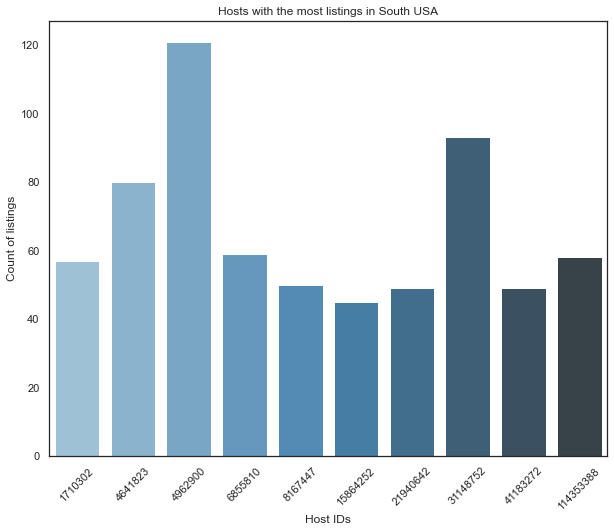

In [11]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in South USA')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [12]:
#There is somewhat uneven distribution among the top 10s 
#10th place is less than half of the 1st place

# Analysis on Metropolitan

In [13]:
all_price_metro = []
for metro in [
    'asheville',
    'austin',
    'nashville',
    'new_orleans',
    'LA'
]:
    metro_price = listings_df[listings_df.metropolitan == metro].price
    metro_info = metro_price.describe(percentiles  = [0.25, 0.5, 0.75])[3:]
    all_price_metro.append(metro_info)

table=pd.DataFrame(all_price_metro)
table.index = [
    'asheville',
    'austin',
    'nashville',
    'new_orleans',
    'LA'
]
table.T

,asheville,austin,nashville,new_orleans,LA
min,16.00,0.0,15.0,0.0,10.0
25%,70.00,89.0,86.0,90.0,69.0
50%,99.00,160.0,130.0,135.0,100.0
75%,149.25,340.0,225.0,220.0,170.0
max,2000.00,10000.0,2600.0,9999.0,10000.0


In [14]:
#looking at price < 600 (outliers)

Text(0.5, 1.0, 'Density and distribution of prices for each metropolitan')

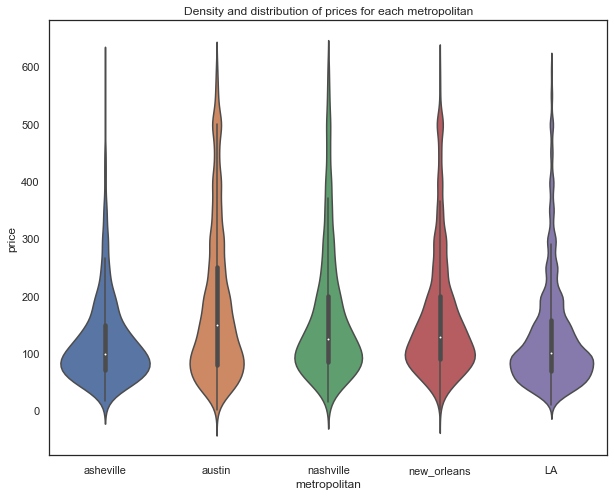

In [15]:
viz_2=sns.violinplot(data=listings_df[listings_df.price < 600], x='metropolitan', y='price')
viz_2.set_title('Density and distribution of prices for each metropolitan')

In [16]:
#generally the medians are very similar while Austin, Nashville, New Orleans have more expensive housing
#Asheville and LA have a wider distribution of cheaper housing (followed by New Orleans and Nashville).
#In terms of Median Ranking goes: Austin, New Orleans, Nashville, LA, Asheville

In [17]:
#housing that's somehow free
listings_df[listings_df.price == 0]

,Unnamed: 0,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,host_id,...,disabled_parking_spot,wide_clearance_to_shower_and_toilet,flat_smooth_pathway_to_front_door,beach_essentials,accessible-height_bed,ev_charger,tub_with_shower_bench,roll-in_shower_with_shower_bench_or_chair,waterfront,grab-rails_for_shower_and_toilet
2812,2812,2.0,0,1.0,Real Bed,1.0,1.0,moderate,austin,411693,...,0,0,0,0,0,0,0,0,0,0
18997,18997,8.0,19,2.0,Real Bed,3.0,4.0,strict,New Orleans,80465664,...,0,0,0,0,0,0,0,0,0,0


# City Analysis

In [18]:
#There are lots of cities so let's analyze the top 10
listings_df.city.value_counts().head(10)

los angeles       19515
austin             9566
New Orleans        5288
nashville          3214
hermosa beach      1228
west hollywood     1101
santa monica        993
south pasadena      828
Asheville           763
playa del rey       546
Name: city, dtype: int64

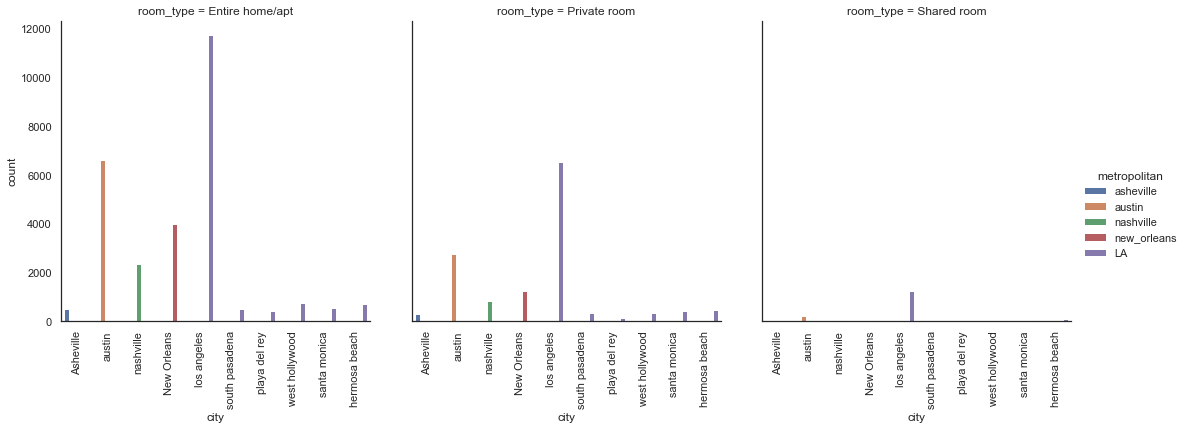

In [19]:
listings_df_popular_city = listings_df[listings_df.city.isin([
    'los angeles', 
    'austin', 
    'New Orleans', 
    'nashville', 
    'hermosa beach', 
    'west hollywood', 
    'santa monica',
    'south pasadena',
    'Asheville',
    'playa del rey'])]

viz_3=sns.catplot(x='city', hue='metropolitan', col='room_type', data=listings_df_popular_city, kind='count')
viz_3.set_xticklabels(rotation=90)

In [20]:
#Entire Home/Apartment:
#most popular: LA, Austin, New Orleans
#Private Room:
#Most popular: LA, Austin, New Orleans
#Shared Room:
#Most popular: LA, Austin

#Austin and LA (and New Orleans) are the most popular.

In [21]:
len(listings_df[listings_df.room_type == 'Shared room'])/len(listings_df)
#there's barely any shared room

0.03889032411915502

# Geographic Analysis

In [22]:
#for plotting on map
print(listings_df[listings_df.price < 600].longitude.min())
print(listings_df[listings_df.price < 600].longitude.max())
print(listings_df[listings_df.price < 600].latitude.min())
print(listings_df[listings_df.price < 600].latitude.max())

-118.91102598739808
-82.41730445018969
29.89826583262301
36.35693014935886


No handles with labels found to put in legend.


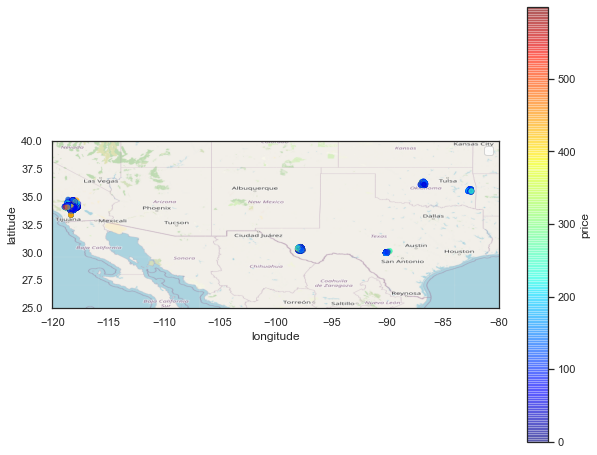

In [23]:
plt.figure(figsize=(10,8))
south_USA=  plt.imread('./images/southUSA.png')
plt.imshow(south_USA,zorder=0,extent= [-120, -80, 25, 40])
ax = plt.gca()
ax.scatter(listings_df[listings_df.price < 600].longitude, listings_df[listings_df.price < 600].latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
listings_df[listings_df.price < 600].plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

In [24]:
#Not very useful.
#Let's do for each metropolitan area

In [25]:
for metro in listings_df.metropolitan.unique():
    print(metro)
    metro_temp = listings_df[listings_df.metropolitan == metro]
    print(metro_temp.longitude.min())
    print(metro_temp.longitude.max())
    print(metro_temp.latitude.min())
    print(metro_temp.latitude.max())
    

asheville
-82.77013109087184
-82.41730445018969
35.40740034257261
35.68555826321574
austin
-98.05355280750835
-97.5606217543175
30.11488211103231
30.506687918407177
nashville
-87.0349826422859
-86.5464573530145
35.99972575514116
36.36659263220601
new_orleans
-90.13590208867979
-89.75333791955971
29.89826583262301
30.138585757541552
LA
-118.91102598739808
-117.6554707816984
33.33890467150096
34.74208827963189


No handles with labels found to put in legend.


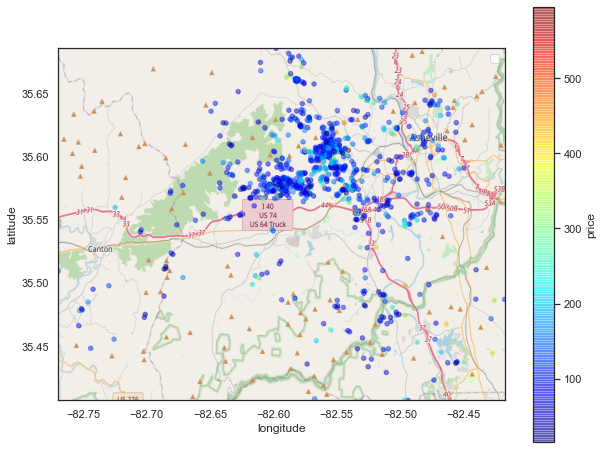

In [26]:
plt.figure(figsize=(10,8))
asheville=  plt.imread('./images/asheville.png')
plt.imshow(asheville,zorder=0,extent= [-82.77013109087184, -82.41730445018969, 35.40740034257261, 35.68555826321574])
ax = plt.gca()
ashe = listings_df[listings_df.metropolitan == 'asheville']
ashe = ashe[ashe.price < 600]
ax.scatter(ashe.longitude, ashe.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
ashe.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


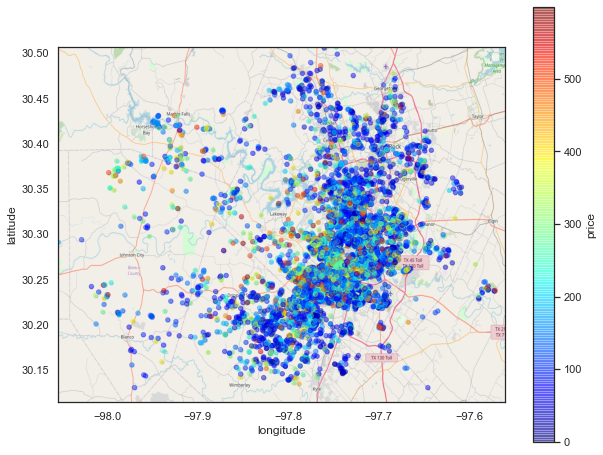

In [27]:
plt.figure(figsize=(10,8))
austin=  plt.imread('./images/austin.png')
plt.imshow(austin,zorder=0,extent= [-98.05355280750835,
-97.5606217543175,
30.11488211103231,
30.506687918407177])
ax = plt.gca()
austin = listings_df[listings_df.metropolitan == 'austin']
austin = austin[austin.price < 600]
ax.scatter(austin.longitude, austin.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
austin.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


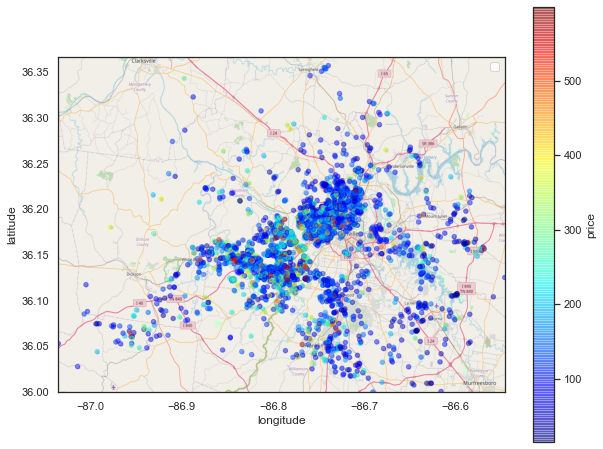

In [28]:
plt.figure(figsize=(10,8))
nashville=  plt.imread('./images/nashville.png')
plt.imshow(nashville,zorder=0,extent= [-87.0349826422859,
-86.5464573530145,
35.99972575514116,
36.36659263220601])
ax = plt.gca()
nashville = listings_df[listings_df.metropolitan == 'nashville']
nashville = nashville[nashville.price < 600]
ax.scatter(nashville.longitude, nashville.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
nashville.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


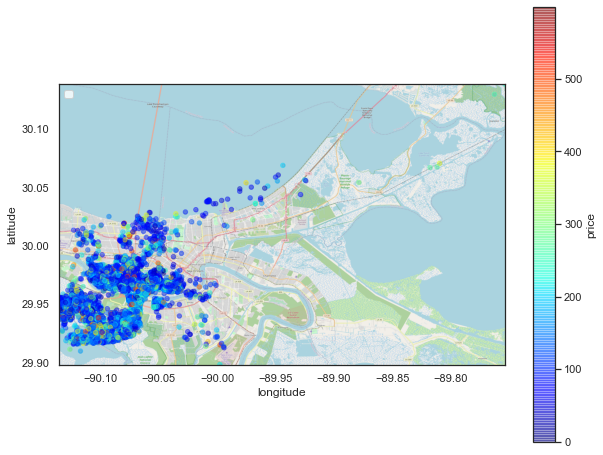

In [29]:
plt.figure(figsize=(10,8))
new_orleans = plt.imread('./images/new_orleans.png')
plt.imshow(new_orleans,zorder=0,extent= [
-90.13590208867979,
-89.75333791955971,
29.89826583262301,
30.138585757541552])
ax = plt.gca()
new_orleans = listings_df[listings_df.metropolitan == 'new_orleans']
new_orleans = new_orleans[new_orleans.price < 600]
ax.scatter(new_orleans.longitude, new_orleans.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
new_orleans.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


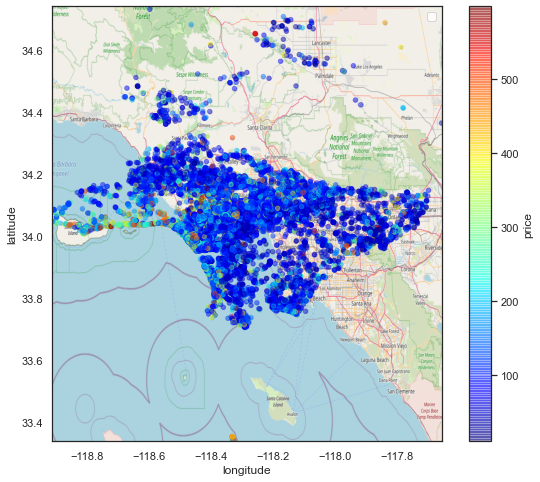

In [30]:
plt.figure(figsize=(10,8))
la = plt.imread('./images/la.png')
plt.imshow(la,zorder=0,extent= [
-118.91102598739808,
-117.6554707816984,
33.33890467150096,
34.74208827963189])
ax = plt.gca()
la = listings_df[listings_df.metropolitan == 'LA']
la = la[la.price < 600]
ax.scatter(la.longitude, la.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
la.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

# Name Analysis

In [31]:
names_lst =[]
#getting name strings from the column and appending it to the list
for name in listings_df.name:
    names_lst.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in names_lst:
    for word in split_name(x):
        word=word.lower()
        names_for_count_.append(word)

In [32]:
from collections import Counter
#let's see top 25 used words by host to name their listing
top_words =Counter(names_for_count_).most_common()
top_50_words =top_words[0:50]

In [33]:
#now let's put our findings in dataframe for further visualizations
top_50_words_df=pd.DataFrame(top_50_words)
top_50_words_df.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(1, 0, 'private'),
 Text(2, 0, 'room'),
 Text(3, 0, 'home'),
 Text(4, 0, 'the'),
 Text(5, 0, 'to'),
 Text(6, 0, 'house'),
 Text(7, 0, 'bedroom'),
 Text(8, 0, 'cozy'),
 Text(9, 0, 'hollywood'),
 Text(10, 0, '&'),
 Text(11, 0, 'downtown'),
 Text(12, 0, 'with'),
 Text(13, 0, 'apartment'),
 Text(14, 0, '-'),
 Text(15, 0, 'near'),
 Text(16, 0, 'beach'),
 Text(17, 0, 'studio'),
 Text(18, 0, 'of'),
 Text(19, 0, 'and'),
 Text(20, 0, '2'),
 Text(21, 0, 'modern'),
 Text(22, 0, 'austin'),
 Text(23, 0, '1'),
 Text(24, 0, 'luxury'),
 Text(25, 0, 'beautiful'),
 Text(26, 0, 'spacious'),
 Text(27, 0, 'la'),
 Text(28, 0, 'from'),
 Text(29, 0, 'charming'),
 Text(30, 0, 'for'),
 Text(31, 0, 'bath'),
 Text(32, 0, 'heart'),
 Text(33, 0, 'apt'),
 Text(34, 0, 'hills'),
 Text(35, 0, 'venice'),
 Text(36, 0, 'east'),
 Text(37, 0, 'a'),
 Text(38, 0, 'new'),
 Text(39, 0, 'bed'),
 Text(40, 0, 'condo'),
 Text(41, 0, 'bungalow'),
 Text(42, 0, 'west'),
 Text(43, 0, 'guest'),
 Text(44, 0, 'on')

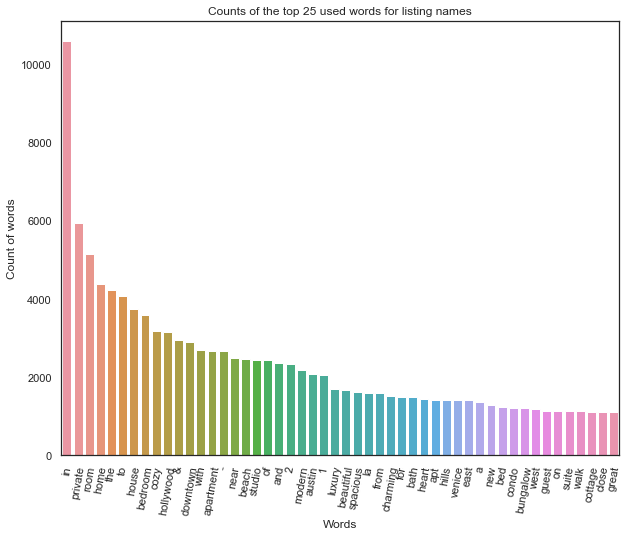

In [34]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=top_50_words_df)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

# room type

In [35]:
room_data = []
for room_type in np.unique(listings_df.room_type):
    room = listings_df[listings_df.room_type == room_type]
    room_data.append([room.price.mean(), room.price.median(), len(room)/len(listings_df) *100])
room_df = pd.DataFrame(room_data)
room_df.index = np.unique(listings_df.room_type)
room_df.columns = ['mean price', 'median price', 'proportion']

In [36]:
room_df

,mean price,median price,proportion
Entire home/apt,271.775154,159.0,62.769023
Private room,93.054178,70.0,33.341945
Shared room,60.968319,35.0,3.889032


# Price Distribution

<AxesSubplot:ylabel='Frequency'>

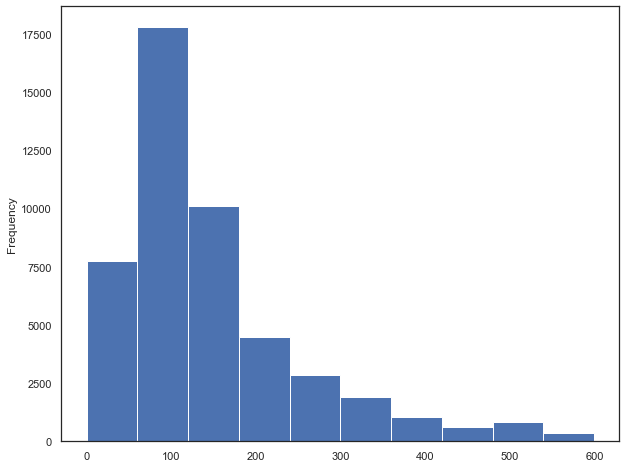

In [37]:
listings_df[listings_df.price < 600].price.plot.hist()

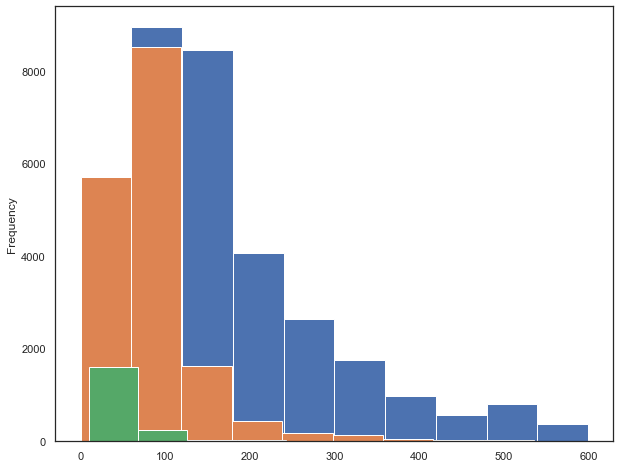

In [38]:
for room_type in np.unique(listings_df.room_type):
    room = listings_df[listings_df.room_type == room_type]
    room[room.price < 600].price.plot.hist()

In [39]:
for column in listings_df.columns:
    print(column)

Unnamed: 0
accommodates
availability_30
bathrooms
bed_type
bedrooms
beds
cancellation_policy
city
host_id
id
instant_bookable
latitude
longitude
metropolitan
name
price
property_type
review_scores_checkin
review_scores_cleanliness
review_scores_communication
review_scores_location
review_scores_rating
review_scores_value
room_type
state
weekly_price
zipcode
Unnamed: 28
air_conditioning
breakfast
cable_tv
carbon_monoxide_detector
elevator_in_building
essentials
family/kid_friendly
fire_extinguisher
first_aid_kit
free_parking_on_premises
gym
hangers
heating
indoor_fireplace
internet
kitchen
lock_on_bedroom_door
pets_allowed
pets_live_on_this_property
pool
self_check-in
shampoo
smoke_detector
smoking_allowed
suitable_for_events
translation_missing:_en.hosting_amenity_49
translation_missing:_en.hosting_amenity_50
tv
wheelchair_accessible
wireless_internet
buzzer/wireless_intercom
cat(s)
dog(s)
doorman_entry
dryer
hair_dryer
hot_tub
keypad
lockbox
safety_card
washer
24-hour_check-in
doorman

In [40]:
listings_df = listings_df.drop(['Unnamed: 0', 'Unnamed: 28'],axis=1)

# Profit

In [51]:
calendar_df = pd.read_pickle('./cleaned_datasets/calendar_cleaned.pkl')
calendar_df = calendar_df[calendar_df.available]
calendar_df

,listing_id,date,available,price,metro_area
39,665257,2016-05-31,True,105.0,asheville
40,665257,2016-06-01,True,105.0,asheville
41,665257,2016-06-02,True,105.0,asheville
42,665257,2016-06-03,True,105.0,asheville
43,665257,2016-06-04,True,105.0,asheville
...,...,...,...,...,...
18383944,17383627,2017-05-13,True,500.0,LA
18383945,17383627,2017-05-12,True,500.0,LA
18383946,17383627,2017-05-11,True,500.0,LA
18383947,17383627,2017-05-10,True,500.0,LA


In [55]:
calendar_df_2016 = calendar_df[pd.DatetimeIndex(calendar_df.date).year == 2016]
calendar_df_2017 = calendar_df[pd.DatetimeIndex(calendar_df.date).year == 2017]
calendar_df_2018 = calendar_df[pd.DatetimeIndex(calendar_df.date).year == 2018]

In [73]:
year_dict = {
    2016: calendar_df_2016,
    2017: calendar_df_2017,
    2018: calendar_df_2018,
}
def id_profit(list_id, year):
    calendar_df = year_dict[year]
    total_profit = calendar_df[calendar_df.listing_id == list_id].price.sum()
    return total_profit

listings_df['profit_df_2016'] = listings_df.apply(lambda row: id_profit(row.id, 2016), axis=1)


    
    

In [74]:
listings_df.profit_df_2016

0        22575.0
1        22600.0
2        11385.0
3         6000.0
4         5808.0
          ...   
50316        0.0
50317        0.0
50318        0.0
50319        0.0
50320        0.0
Length: 50321, dtype: float64

In [75]:
listings_df['profit_df_2017'] = listings_df.apply(lambda row: id_profit(row.id, 2017), axis=1)

In [76]:
listings_df['profit_df_2018'] = listings_df.apply(lambda row: id_profit(row.id, 2018), axis=1)

In [77]:
listings_df

,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,host_id,id,...,beach_essentials,accessible-height_bed,ev_charger,tub_with_shower_bench,roll-in_shower_with_shower_bench_or_chair,waterfront,grab-rails_for_shower_and_toilet,profit_df_2016,profit_df_2017,profit_df_2018
0,2.0,0,1.0,Real Bed,1.0,1.0,moderate,Asheville,2600734,665257,...,0,0,0,0,0,0,0,22575.0,11655.0,0.0
1,4.0,17,1.0,Real Bed,1.0,2.0,strict,Asheville,4295819,2746729,...,0,0,0,0,0,0,0,22600.0,5585.0,0.0
2,1.0,29,1.0,Real Bed,1.0,1.0,flexible,Asheville,36223353,6919450,...,0,0,0,0,0,0,0,11385.0,4995.0,0.0
3,6.0,28,2.5,Real Bed,1.0,6.0,moderate,Asheville,746673,12286328,...,0,0,0,0,0,0,0,6000.0,2664.0,0.0
4,6.0,25,2.5,Real Bed,1.0,6.0,moderate,Asheville,746673,156926,...,0,0,0,0,0,0,0,5808.0,2664.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,29,1.0,Real Bed,1.0,1.0,flexible,la habra,107958524,18445825,...,0,0,0,0,0,0,0,0.0,18210.0,9150.0
50317,2.0,29,1.0,Real Bed,1.0,1.0,strict,malibu,850039,18192212,...,0,0,0,0,0,0,0,0.0,36695.0,0.0
50318,10.0,29,5.0,Real Bed,5.0,5.0,flexible,malibu,117101757,17339165,...,0,0,0,0,0,0,0,0.0,121000.0,61000.0
50319,4.0,28,1.0,Real Bed,2.0,2.0,moderate,la habra,121899402,17827299,...,0,0,0,0,0,0,0,0.0,12115.0,0.0


In [94]:
listings_df.to_pickle('./advanced/listings_df_with_total_profit')

In [78]:
listings_df['total_profit'] = listings_df.profit_df_2016 + listings_df.profit_df_2017 + listings_df.profit_df_2018
listings_df

,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,host_id,id,...,accessible-height_bed,ev_charger,tub_with_shower_bench,roll-in_shower_with_shower_bench_or_chair,waterfront,grab-rails_for_shower_and_toilet,profit_df_2016,profit_df_2017,profit_df_2018,total_profit
0,2.0,0,1.0,Real Bed,1.0,1.0,moderate,Asheville,2600734,665257,...,0,0,0,0,0,0,22575.0,11655.0,0.0,34230.0
1,4.0,17,1.0,Real Bed,1.0,2.0,strict,Asheville,4295819,2746729,...,0,0,0,0,0,0,22600.0,5585.0,0.0,28185.0
2,1.0,29,1.0,Real Bed,1.0,1.0,flexible,Asheville,36223353,6919450,...,0,0,0,0,0,0,11385.0,4995.0,0.0,16380.0
3,6.0,28,2.5,Real Bed,1.0,6.0,moderate,Asheville,746673,12286328,...,0,0,0,0,0,0,6000.0,2664.0,0.0,8664.0
4,6.0,25,2.5,Real Bed,1.0,6.0,moderate,Asheville,746673,156926,...,0,0,0,0,0,0,5808.0,2664.0,0.0,8472.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,29,1.0,Real Bed,1.0,1.0,flexible,la habra,107958524,18445825,...,0,0,0,0,0,0,0.0,18210.0,9150.0,27360.0
50317,2.0,29,1.0,Real Bed,1.0,1.0,strict,malibu,850039,18192212,...,0,0,0,0,0,0,0.0,36695.0,0.0,36695.0
50318,10.0,29,5.0,Real Bed,5.0,5.0,flexible,malibu,117101757,17339165,...,0,0,0,0,0,0,0.0,121000.0,61000.0,182000.0
50319,4.0,28,1.0,Real Bed,2.0,2.0,moderate,la habra,121899402,17827299,...,0,0,0,0,0,0,0.0,12115.0,0.0,12115.0


In [88]:
best_100 = listings_df.nlargest(100, 'total_profit')

In [89]:
#metropolitan area for top 100 profit
for metro in listings_df.metropolitan.unique():
    print(metro)
    print(len(best_100[best_100.metropolitan == metro])/100)

asheville
0.0
austin
0.11
nashville
0.0
new_orleans
0.03
LA
0.86


In [106]:
#metropolitan area for top 100 profit
for metro in listings_df.metropolitan.unique():
    print(metro)
    print(len(listings_df[listings_df.metropolitan == metro])/len(listings_df))

asheville
0.017169770076111365
austin
0.1920073130502176
nashville
0.06512191729099183
new_orleans
0.10546292800222572
LA
0.6202380715804535


In [115]:
#metro statistical significance
degree_freedom = len(listings_df.metropolitan.unique())-1
expected = []
actual = []
for metro in listings_df.metropolitan.unique():
    expected.append(len(listings_df[listings_df.metropolitan == metro])/len(listings_df)*100)
    actual.append(len(best_100[best_100.metropolitan == metro]))

print(expected)
print(actual)
    
print(chisquare(f_obs = actual, f_exp = expected, ddof=0))
    
#p_value is very small. There is a significance in LA being of higher profit.

                          

[1.7169770076111364, 19.20073130502176, 6.512191729099183, 10.546292800222572, 62.02380715804535]
[0, 11, 0, 3, 86]
Power_divergenceResult(statistic=26.39975804339582, pvalue=2.6281492421084934e-05)


In [121]:
#city for top 100 profit
for city in listings_df.city.unique():
    proportion = len(best_100[best_100.city == city])/100
    if proportion > 0:
        print(city)
        print(proportion)
        print(len(listings_df[listings_df.city == city])/len(listings_df))
        print(len(best_100[best_100.city == city]))
        print(len(listings_df[listings_df.city == city]))

austin
0.11
0.19009956081953855
11
9566
New Orleans
0.03
0.10508535203990382
3
5288
acton
0.01
5.9617257208720016e-05
1
3
los angeles
0.34
0.38781025814272374
34
19515
whittier
0.03
0.0015301762683571471
3
77
playa del rey
0.02
0.010850340811987044
2
546
beverly hills
0.09
0.009797102601299656
9
493
west hollywood
0.01
0.021879533395600247
1
1101
santa monica
0.03
0.019733312136086326
3
993
pacific palisades
0.01
0.0006359174102263469
1
32
topanga
0.01
0.0038353768804276545
1
193
culver city
0.01
0.005087339281810775
1
256
sherman oaks
0.01
0.0011923451441744003
1
60
hermosa beach
0.04
0.02440333061743606
4
1228
redondo beach
0.01
0.006239939587846029
1
314
universal city
0.01
5.9617257208720016e-05
1
3
malibu
0.23
0.008624629876194828
23
434


In [124]:
#city for top 1000 profit

best_1000 = listings_df.nlargest(1000, 'total_profit')

for city in listings_df.city.unique():
    proportion = len(best_1000[best_1000.city == city])/1000
    if proportion > 0:
        print(city)
        print(proportion)
        print(len(listings_df[listings_df.city == city])/len(listings_df))
        print(len(best_1000[best_1000.city == city]))
        print(len(listings_df[listings_df.city == city]))

Asheville
0.002
0.015162655750084457
2
763
austin
0.31
0.19009956081953855
310
9566
lakeway
0.002
0.0007750243437133602
2
39
sunset valley
0.001
0.00013910693348701336
1
7
west lake hills
0.008
0.0006160449911567735
8
31
nashville
0.045
0.06386995488960871
45
3214
goodlettsville
0.002
0.0001987241906957334
2
10
New Orleans
0.068
0.10508535203990382
68
5288
Arabi
0.001
0.00011923451441744003
1
6
紐奧良
0.001
1.987241906957334e-05
1
1
acton
0.001
5.9617257208720016e-05
1
3
los angeles
0.27
0.38781025814272374
270
19515
agoura hills
0.001
0.001232089982313547
1
62
monterey park
0.002
0.003318693984618748
2
167
south pasadena
0.005
0.016454362989606723
5
828
gardena
0.001
0.0020269867450964808
1
102
castaic
0.001
0.0002583414479044534
1
13
arcadia
0.002
0.004828997833906321
2
243
monrovia
0.001
0.001291707239522267
1
65
temple city
0.001
0.0017885177162616005
1
90
lawndale
0.002
0.006319429264124322
2
318
venice
0.005
0.009439399058047335
5
475
la puente
0.001
0.0008147691818525069
1
41
whitt

In [117]:
#metro statistical significance
degree_freedom = len(listings_df.city.unique())-1
expected = []
actual = []
for city in listings_df.city.unique():
    expected.append(len(listings_df[listings_df.city == city])/len(listings_df)*100)
    actual.append(len(best_100[best_100.city == city]))

print(expected)
print(actual)
    
print(chisquare(f_obs = actual, f_exp = expected, ddof=0))

#THERE IS A MAJOR DIFFERENCE BETWEEN DATA EXPECTED AND DATA OBSERVED
#LA has the most profit
#malib comes at second
#then Austin

#lA and Austin actually have less than expected amount
#malibu more than *26 the expected amount
#what is special about Malibu?

[1.5162655750084457, 0.029808628604360007, 0.003974483813914668, 0.057630015301762684, 0.05961725720872001, 0.047693805766976016, 0.001987241906957334, 19.009956081953856, 0.001987241906957334, 0.07750243437133603, 0.015897935255658673, 0.003974483813914668, 0.001987241906957334, 0.001987241906957334, 0.013910693348701337, 0.001987241906957334, 0.001987241906957334, 0.06160449911567735, 0.001987241906957334, 0.001987241906957334, 0.001987241906957334, 0.001987241906957334, 6.3869954889608715, 0.003974483813914668, 0.011923451441744004, 0.01987241906957334, 0.003974483813914668, 0.03775759623218935, 0.001987241906957334, 0.001987241906957334, 0.003974483813914668, 0.01987241906957334, 0.007948967627829337, 0.007948967627829337, 0.001987241906957334, 0.001987241906957334, 10.508535203990382, 0.011923451441744004, 0.001987241906957334, 0.001987241906957334, 0.001987241906957334, 0.00993620953478667, 0.003974483813914668, 0.001987241906957334, 0.001987241906957334, 0.001987241906957334, 0.

In [125]:
#city for top 100 profit
expected = []
actual = []
for bed in listings_df.bed_type.unique():
    expected.append(len(listings_df[listings_df.bed_type == bed])/len(listings_df)*100)
    actual.append(len(best_100[best_100.bed_type == bed]))

print(chisquare(f_obs = actual, f_exp = expected, ddof=0))

Power_divergenceResult(statistic=2.2353948100744656, pvalue=0.6925547128478691)


In [130]:
important_columns = list(listings_df.columns[:-4])
unnec = ['host_id', 'id', 'latitude', 'longitude']
for un in unnec:
    important_columns.remove(un)
for col in important_columns:
    print(col)

    

accommodates
availability_30
bathrooms
bed_type
bedrooms
beds
cancellation_policy
city
instant_bookable
metropolitan
name
price
property_type
review_scores_checkin
review_scores_cleanliness
review_scores_communication
review_scores_location
review_scores_rating
review_scores_value
room_type
state
weekly_price
zipcode
air_conditioning
breakfast
cable_tv
carbon_monoxide_detector
elevator_in_building
essentials
family/kid_friendly
fire_extinguisher
first_aid_kit
free_parking_on_premises
gym
hangers
heating
indoor_fireplace
internet
kitchen
lock_on_bedroom_door
pets_allowed
pets_live_on_this_property
pool
self_check-in
shampoo
smoke_detector
smoking_allowed
suitable_for_events
translation_missing:_en.hosting_amenity_49
translation_missing:_en.hosting_amenity_50
tv
wheelchair_accessible
wireless_internet
buzzer/wireless_intercom
cat(s)
dog(s)
doorman_entry
dryer
hair_dryer
hot_tub
keypad
lockbox
safety_card
washer
24-hour_check-in
doorman
free_parking_on_street
iron
washer_/_dryer
laptop_fr

In [132]:
for col in important_columns:
    expected = []
    actual = []
    for spec in listings_df[col].unique():
        expected.append(len(listings_df[listings_df[col] == spec])/len(listings_df)*100)
        actual.append(len(best_100[best_100[col] == spec]))
    p_val = chisquare(f_obs = actual, f_exp = expected, ddof=0)[1]
    if p_val < 0.05:
        print(col)
        print(p_val)
        
        

accommodates
3.2999953145200823e-218
availability_30
2.2346421704260318e-36
bathrooms
0.0
bedrooms
0.0
beds
6.831924074350795e-145
cancellation_policy
1.0402254086987387e-54
city
1.3981673037832813e-121
metropolitan
2.6281492421084934e-05
price
0.0
property_type
4.643372982655741e-158
review_scores_checkin
0.004610341456497617
review_scores_cleanliness
0.0003856690183845243
review_scores_location
0.007273696082852918
review_scores_rating
9.998777387431663e-08
review_scores_value
0.0077479605196821835
room_type
1.2043425581557256e-06
state
0.0001869073410979312
weekly_price
0.0
zipcode
7.523135820673577e-196
carbon_monoxide_detector
0.0012146147569187414
essentials
2.7142928586839905e-08
family/kid_friendly
0.000982599876804961
gym
0.02155065547512285
hangers
0.009859307861459173
heating
0.00021767302331017499
indoor_fireplace
2.6973308531086762e-21
internet
4.054690558274087e-05
pets_live_on_this_property
0.0025897308457113917
pool
5.392214469237106e-22
self_check-in
0.0005399788915247

In [133]:
for col in important_columns:
    expected = []
    actual = []
    for spec in listings_df[col].unique():
        expected.append(len(listings_df[listings_df[col] == spec])/len(listings_df)*1000)
        actual.append(len(best_1000[best_1000[col] == spec]))
    p_val = chisquare(f_obs = actual, f_exp = expected, ddof=0)[1]
    if p_val < 0.05:
        print(col)
        print(p_val)

accommodates
0.0
availability_30
3.214839869053354e-220
bathrooms
0.0
bed_type
0.021277438339178896
bedrooms
0.0
beds
0.0
cancellation_policy
7.718715848378874e-104
city
6.554140179324403e-233
instant_bookable
2.521141742768838e-14
metropolitan
1.2957233178592223e-25
price
0.0
property_type
3.0816072213625303e-242
review_scores_checkin
2.3880414009760507e-07
review_scores_cleanliness
4.0650394448125e-21
review_scores_communication
8.876438277802291e-05
review_scores_location
1.402404014525297e-17
review_scores_rating
3.781777519315058e-46
review_scores_value
0.002323441450812576
room_type
1.3941102421757824e-104
state
3.983311112782185e-24
weekly_price
0.0
zipcode
0.0
air_conditioning
2.7250847155481824e-09
breakfast
0.0025040442600052343
cable_tv
1.545384724646114e-50
carbon_monoxide_detector
0.0012587812913214655
elevator_in_building
3.6569757414444004e-08
essentials
2.3632972726757476e-07
family/kid_friendly
1.0495960558291626e-42
free_parking_on_premises
2.372715365797544e-19
hange

In [104]:
#city for top 100 profit
for cp in listings_df.cancellation_policy.unique():
    proportion = len(best_100[best_100.cancellation_policy == cp])/100
    if proportion > 0:
        print(cp)
        print(proportion)

moderate
0.03
strict
0.53
flexible
0.38
super_strict_60
0.06


In [105]:
#city for top 100 profit
for cp in listings_df.cancellation_policy.unique():
    proportion = len(listings_df[listings_df.cancellation_policy == cp])/len(listings_df)
    if proportion > 0:
        print(cp)
        print(proportion)

moderate
0.24979630770453687
strict
0.44269787961288526
flexible
0.3054788259374814
super_strict_30
0.0005365553148784801
super_strict_60
0.0014308141730092804
no_refunds
5.9617257208720016e-05


In [3]:
listings_df = pd.read_pickle('./advanced/listings_df_with_total_profit')

In [4]:
listings_df

,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,host_id,id,...,accessible-height_bed,ev_charger,tub_with_shower_bench,roll-in_shower_with_shower_bench_or_chair,waterfront,grab-rails_for_shower_and_toilet,profit_df_2016,profit_df_2017,profit_df_2018,total_profit
0,2.0,0,1.0,Real Bed,1.0,1.0,moderate,Asheville,2600734,665257,...,0,0,0,0,0,0,22575.0,11655.0,0.0,34230.0
1,4.0,17,1.0,Real Bed,1.0,2.0,strict,Asheville,4295819,2746729,...,0,0,0,0,0,0,22600.0,5585.0,0.0,28185.0
2,1.0,29,1.0,Real Bed,1.0,1.0,flexible,Asheville,36223353,6919450,...,0,0,0,0,0,0,11385.0,4995.0,0.0,16380.0
3,6.0,28,2.5,Real Bed,1.0,6.0,moderate,Asheville,746673,12286328,...,0,0,0,0,0,0,6000.0,2664.0,0.0,8664.0
4,6.0,25,2.5,Real Bed,1.0,6.0,moderate,Asheville,746673,156926,...,0,0,0,0,0,0,5808.0,2664.0,0.0,8472.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,29,1.0,Real Bed,1.0,1.0,flexible,la habra,107958524,18445825,...,0,0,0,0,0,0,0.0,18210.0,9150.0,27360.0
50317,2.0,29,1.0,Real Bed,1.0,1.0,strict,malibu,850039,18192212,...,0,0,0,0,0,0,0.0,36695.0,0.0,36695.0
50318,10.0,29,5.0,Real Bed,5.0,5.0,flexible,malibu,117101757,17339165,...,0,0,0,0,0,0,0.0,121000.0,61000.0,182000.0
50319,4.0,28,1.0,Real Bed,2.0,2.0,moderate,la habra,121899402,17827299,...,0,0,0,0,0,0,0.0,12115.0,0.0,12115.0


No handles with labels found to put in legend.


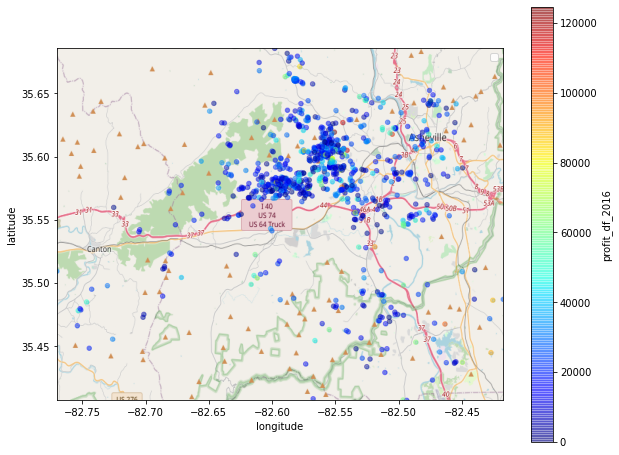

In [5]:
plt.figure(figsize=(10,8))
asheville=  plt.imread('./images/asheville.png')
plt.imshow(asheville,zorder=0,extent= [-82.77013109087184, -82.41730445018969, 35.40740034257261, 35.68555826321574])
ax = plt.gca()
ashe = listings_df[listings_df.metropolitan == 'asheville']
ashe = ashe[ashe.price < 600]
ax.scatter(ashe.longitude, ashe.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
ashe.plot(kind='scatter', x='longitude', y='latitude', c='profit_df_2016', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


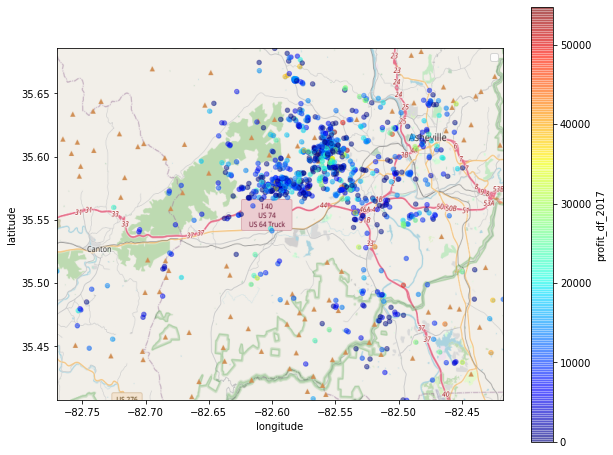

In [6]:
plt.figure(figsize=(10,8))
asheville=  plt.imread('./images/asheville.png')
plt.imshow(asheville,zorder=0,extent= [-82.77013109087184, -82.41730445018969, 35.40740034257261, 35.68555826321574])
ax = plt.gca()
ashe = listings_df[listings_df.metropolitan == 'asheville']
ashe = ashe[ashe.price < 600]
ax.scatter(ashe.longitude, ashe.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
ashe.plot(kind='scatter', x='longitude', y='latitude', c='profit_df_2017', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


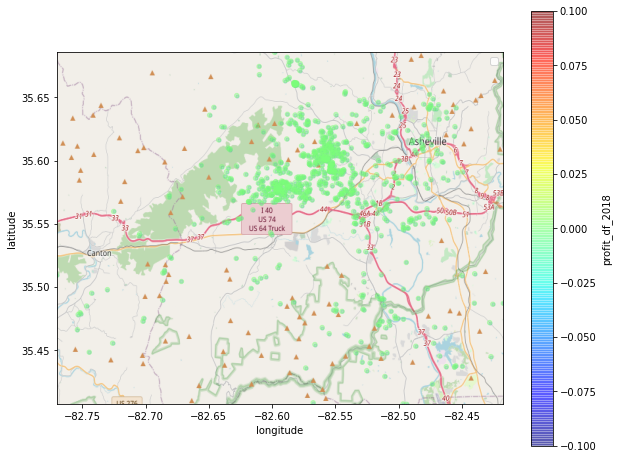

In [8]:
plt.figure(figsize=(10,8))
asheville=  plt.imread('./images/asheville.png')
plt.imshow(asheville,zorder=0,extent= [-82.77013109087184, -82.41730445018969, 35.40740034257261, 35.68555826321574])
ax = plt.gca()
ashe = listings_df[listings_df.metropolitan == 'asheville']
ashe = ashe[ashe.price < 600]
ax.scatter(ashe.longitude, ashe.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
ashe.plot(kind='scatter', x='longitude', y='latitude', c='profit_df_2018', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

In [10]:
listings_df[listings_df.metropolitan == 'asheville']['profit_df_2018'].describe()

count    864.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: profit_df_2018, dtype: float64

No handles with labels found to put in legend.


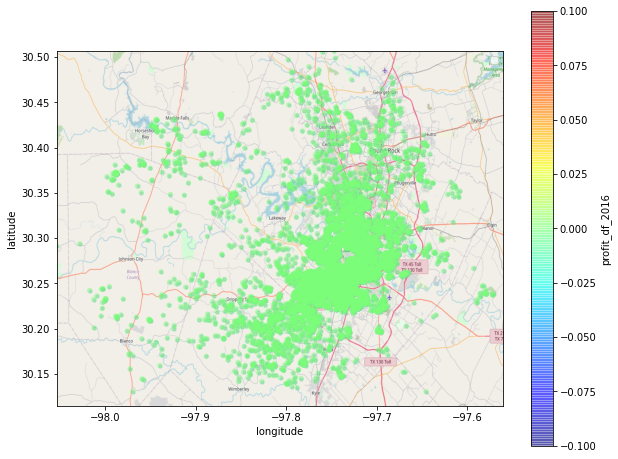

In [12]:
plt.figure(figsize=(10,8))
austin=  plt.imread('./images/austin.png')
plt.imshow(austin,zorder=0,extent= [-98.05355280750835,
-97.5606217543175,
30.11488211103231,
30.506687918407177])
ax = plt.gca()
austin = listings_df[listings_df.metropolitan == 'austin']
austin = austin[austin.price < 600]
ax.scatter(austin.longitude, austin.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
austin.plot(kind='scatter', x='longitude', y='latitude', c='profit_df_2016', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


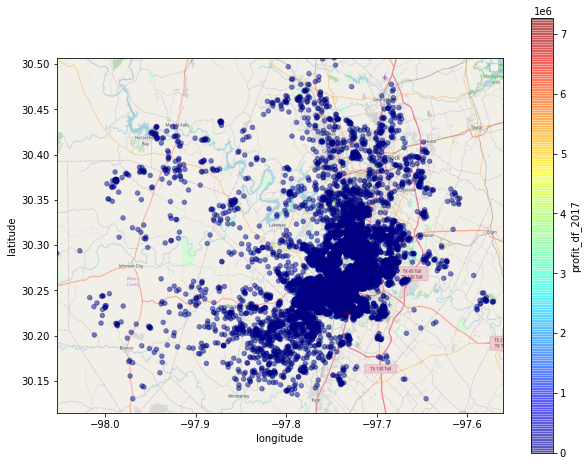

In [13]:
plt.figure(figsize=(10,8))
austin=  plt.imread('./images/austin.png')
plt.imshow(austin,zorder=0,extent= [-98.05355280750835,
-97.5606217543175,
30.11488211103231,
30.506687918407177])
ax = plt.gca()
austin = listings_df[listings_df.metropolitan == 'austin']
austin = austin[austin.price < 600]
ax.scatter(austin.longitude, austin.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
austin.plot(kind='scatter', x='longitude', y='latitude', c='profit_df_2017', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


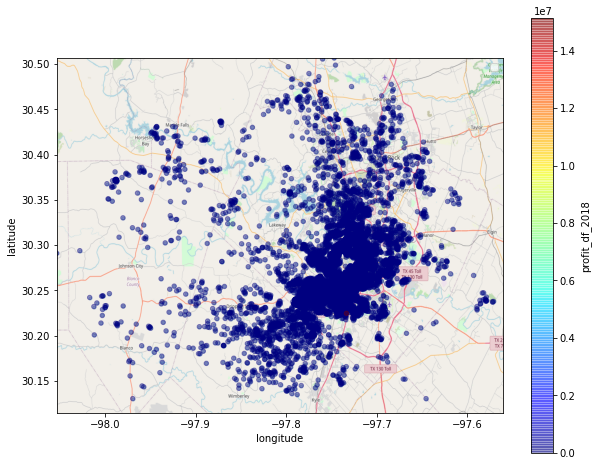

In [14]:
plt.figure(figsize=(10,8))
austin=  plt.imread('./images/austin.png')
plt.imshow(austin,zorder=0,extent= [-98.05355280750835,
-97.5606217543175,
30.11488211103231,
30.506687918407177])
ax = plt.gca()
austin = listings_df[listings_df.metropolitan == 'austin']
austin = austin[austin.price < 600]
ax.scatter(austin.longitude, austin.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
austin.plot(kind='scatter', x='longitude', y='latitude', c='profit_df_2018', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

# Venues

In [41]:
venues_df = pd.read_csv('./cleaned_datasets/venues.csv')

In [49]:
venues_df

,Unnamed: 0,city,id,latitude,longitude,name,rating,accounting,airport,amusement_park,...,train_station,transit_station,travel_agency,university,veterinary_care,zoo,embassy,neighborhood,point_of_interest,establishment
0,0,asheville,8736e812595db852ccab223019a477b918b64d4d,35.442805,-82.264081,The Esmeralda Inn & Restaurant,4.4,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,asheville,479c99c6cc5aa91a6161fecc48bd24258a74bd58,35.564035,-82.278943,Straightaway Cafe,4.5,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2,asheville,3e41ce673ee203416cb6f44894e49b2ee93347b1,35.564140,-82.278953,straightaway cafe,NaN,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,3,asheville,ce0b0e6fc251f546370fed20d39778ea796e5475,35.646791,-82.299074,The Huckleberry Cafe,5.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,4,asheville,f60446561634f4d44e6563dcf17f2b65eb4096f2,35.752135,-82.273258,Mount Mitchell State Park- Restaurant,4.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121002,121002,los angeles,011132e6cc3e3a0040e89b9ac1b91804ad57b544,34.149800,-118.400532,Henry Films Inc,5.0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
121003,121003,los angeles,824cbcf1d371e1594220b32bfd905c3f21bec09f,34.154163,-118.415763,Boney Island,4.8,0,0,1,...,0,0,0,0,0,0,0,0,1,1
121004,121004,los angeles,46106265190691f9e91e1cd0bc95dab12cd2dffd,34.008576,-118.498101,Pacific Park,4.5,0,0,1,...,0,0,0,0,0,0,0,0,1,1
121005,121005,los angeles,53a98917cb8f751b1ccfa16d06b4003168431bb4,34.211193,-118.492984,Sky Zone Trampoline Park,4.3,0,0,1,...,0,0,0,0,0,0,0,0,1,1


# Feature Engineering

In [42]:
listings_ml_df = listings_df
#throwing away unnecessary columns
listings_ml_df = listings_ml_df.drop([
    'host_id',
    'id',
    'name',
    'zipcode',
    'state',
], axis=1)

In [43]:
bed_type_encode = pd.get_dummies(listings_ml_df.bed_type)
cp_encode = pd.get_dummies(listings_ml_df.cancellation_policy)
listings_ml_df.instant_bookable[listings_ml_df.instant_bookable == 'f'] = 0
listings_ml_df.instant_bookable[listings_ml_df.instant_bookable == 't'] = 1
metro_encode = pd.get_dummies(listings_ml_df.metropolitan)
property_encode = pd.get_dummies(listings_ml_df.property_type)
room_encode = pd.get_dummies(listings_ml_df.room_type)

<ipython-input-43-af2e7cfd8c8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_ml_df.instant_bookable[listings_ml_df.instant_bookable == 'f'] = 0
<ipython-input-43-af2e7cfd8c8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_ml_df.instant_bookable[listings_ml_df.instant_bookable == 't'] = 1


In [44]:
listings_ml_df = listings_ml_df.drop([
    'bed_type', 
    'cancellation_policy',
    'city',
    'instant_bookable',
    'metropolitan',
    'property_type',
    'room_type',
    'weekly_price'
                    ], axis=1)

listings_ml_df = pd.concat([
    listings_ml_df,
    bed_type_encode,
    cp_encode,
    metro_encode,
    property_encode,
    room_encode], axis=1)

In [45]:
listings_ml_df

,accommodates,availability_30,bathrooms,bedrooms,beds,latitude,longitude,price,review_scores_checkin,review_scores_cleanliness,...,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,Entire home/apt,Private room,Shared room
0,2.0,0,1.0,1.0,1.0,35.590784,-82.591466,105.0,10.0,9.0,...,0,0,0,0,0,0,0,1,0,0
1,4.0,17,1.0,1.0,2.0,35.584968,-82.632199,125.0,10.0,10.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,29,1.0,1.0,1.0,35.626600,-82.637618,45.0,10.0,10.0,...,0,0,0,0,0,0,0,0,1,0
3,6.0,28,2.5,1.0,6.0,35.579159,-82.596392,24.0,10.0,10.0,...,0,0,0,0,0,0,0,0,0,1
4,6.0,25,2.5,1.0,6.0,35.577755,-82.594996,24.0,10.0,9.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,29,1.0,1.0,1.0,33.930022,-117.974940,75.0,10.0,10.0,...,0,0,0,0,0,0,0,0,1,0
50317,2.0,29,1.0,1.0,1.0,34.037906,-118.654012,205.0,10.0,10.0,...,0,0,0,0,0,0,0,0,1,0
50318,10.0,29,5.0,5.0,5.0,34.036676,-118.650505,500.0,10.0,10.0,...,0,0,0,0,0,1,0,1,0,0
50319,4.0,28,1.0,2.0,2.0,33.944261,-117.927134,65.0,10.0,10.0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(listings_ml_df.drop(['price'], axis=1), listings_ml_df.price)

In [48]:
rf = RandomForestRegressor(random_state=0, verbose=2)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100


KeyboardInterrupt: 

In [ ]:
print(rf.score(X_train, y_train))

In [ ]:
print(rf.score(X_test, y_test))

In [ ]:
print(rf.feature_importances_)

In [ ]:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [ ]:
for ii in range(len(X_train.columns)):
    if rf.feature_importances_[ii] > 0.01:
        print(X_train.columns[ii])
        print(rf.feature_importances_[ii])

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = listings_ml_df.drop(['price'], axis=1).dtypes == int

mi_scores = make_mi_scores(listings_ml_df.drop(['price'], axis=1), listings_ml_df.price, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

In [ ]:
print(mi_scores[mi_scores > 0.01])